In [1]:
import pandas as pd
from helpers import plot_wordcloud, preprocessing_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
raw_train_set = pd.read_csv("data/train.csv")
raw_test_set = pd.read_csv("data/test.csv")


In [4]:
train_set = preprocessing_pipeline(raw_train_set)
# test_set = preprocessing_pipeline(raw_test_set)

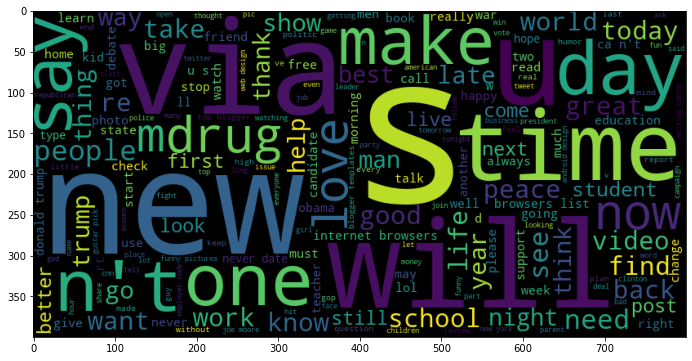

In [5]:
plot_wordcloud(train_set, 0)

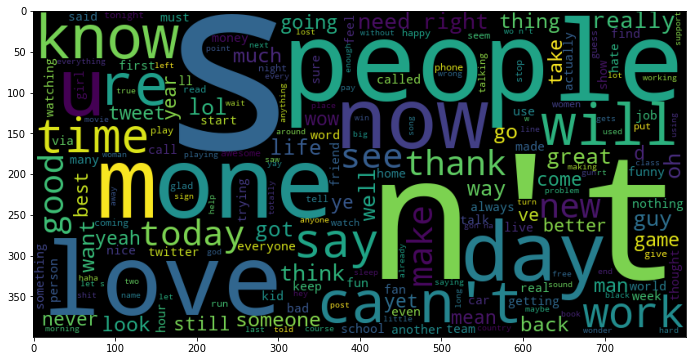

In [6]:
plot_wordcloud(train_set, 1)

In [7]:
X = train_set['tweets']  
y = train_set['class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

In [8]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

TfidfVectorizer()

In [9]:
model = LogisticRegression()
X_train_vectorized = vectorizer.transform(X_train)
model.fit(X_train_vectorized, y_train)
X_test_vectorized = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vectorized)

/Users/haim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature Engineering

In [10]:
model = LogisticRegression(solver="lbfgs",multi_class="auto", n_jobs=8)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63      5603
           1       0.81      0.94      0.87     12435

    accuracy                           0.81     18038
   macro avg       0.80      0.73      0.75     18038
weighted avg       0.80      0.81      0.79     18038



/Users/haim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
